In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal 
import scipy.fftpack
from pylab import *
from scipy import pi
import pylab
import cmath
import sys
import tensorflow as tf

print(tf.__version__)

/home/yukun/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/yukun/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/yukun/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/yukun/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


2.0.0-rc0


## AE data analysis

In [5]:
# Import DATA
no = 30
url = "/media/yukun/2C167E66167E30C6/AE_data/20180104 正常砂輪研磨/第一次研磨(過負載)/AEdate_"+str(no)+".lvm"

dt_loading = pd.read_fwf(url, widths=[10])[21:5000021] # samples : 4999168 (1024 * 4882) (2^22 = 4194304)
dt_tartype = np.array(dt_loading, dtype = np.float_) 
#ae_rawdata = pd.DataFrame(dt_tartype)#[0:4999168]
#ae_rawdata = dt_tartype.flatten()
ae_rawdata = dt_tartype.ravel()

# show the raw signal data
print(ae_rawdata)

[-0.119629 -0.236816 -0.288086 ...  0.144043 -0.493164 -0.822754]


ae data sample rate :5000000


Text(0, 0.5, 'volt')

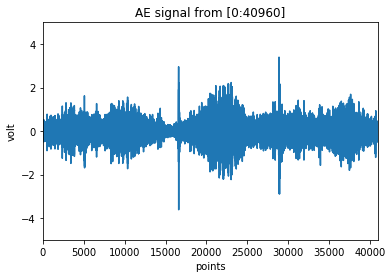

In [12]:
# show the raw signal plot
ae_data = ae_rawdata - ae_rawdata.mean()

sample_rate = len(ae_data)
print("ae data sample rate :{0}".format(sample_rate))

plt.plot(range(40960), ae_data[:40960])
plt.xlim(0,40960)
plt.ylim(-5,5)
plt.title("AE signal from [0:40960]")
plt.xlabel("points")
plt.ylabel("volt")

In [18]:
ae_max = np.max(np.abs(ae_data))
ae_min = np.min(np.abs(ae_data))
print("Maxima AE data: {0}".format(ae_max))
print("Minima AE data: {0}".format(ae_min))

Maxima AE data:5.1520097613404
Minima AE data:0.0006417613403998934


## STFT

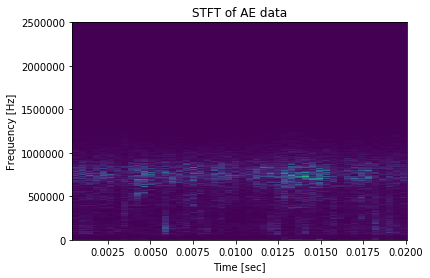

STFT factor shape f : (2049,)
STFT factor shape t : (49,)
STFT factor shape Sxx : (2049, 49)


In [57]:
window_size = 4096
[f,t,Sxx]=signal.spectral.spectrogram(x = ae_data[:102400],
                                    fs = sample_rate,
                                    window = np.hamming(window_size),
                                    nperseg = window_size,
                                    noverlap = window_size // 2,
                                    nfft = None,
                                    detrend = False,
                                    return_onesided = True,
                                    mode = 'magnitude')
# plt.pcolormesh(t, f, Sxx)
plt.pcolormesh(t, np.fft.fftshift(f), np.fft.fftshift(Sxx, axes=0))
plt.title("STFT of AE data")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

print("STFT factor shape f : {0}".format(shape(f)))
print("STFT factor shape t : {0}".format(shape(t)))
print("STFT factor shape Sxx : {0}".format(shape(Sxx)))

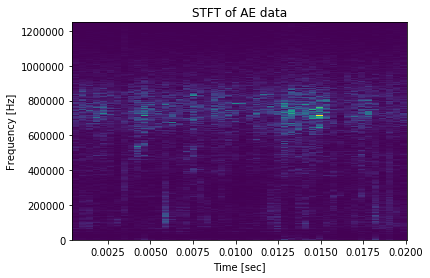

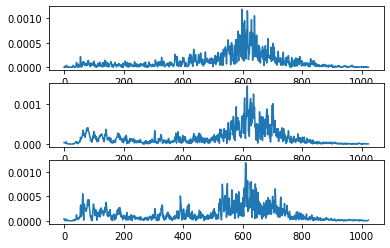

In [66]:
plt.pcolormesh(t,f[:1024],Sxx[:1024])
plt.title("STFT of AE data")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.figure()
plt.subplot(3,1,1)
plt.plot(Sxx[:1024,0])
plt.subplot(3,1,2)
plt.plot(Sxx[:1024,1])
plt.subplot(3,1,3)
plt.plot(Sxx[:1024,2])
plt.show()

## Vibration data analysis

## Load Equipment data from .CSV file 